In [18]:
import sys 
sys.path.append('..')

from models import DIFDensityEstimator,SoftmaxWeight,LocationScaleFlow
from models import EMDensityEstimator
from targets import Target, Uniform
%load_ext autoreload
%autoreload 2
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


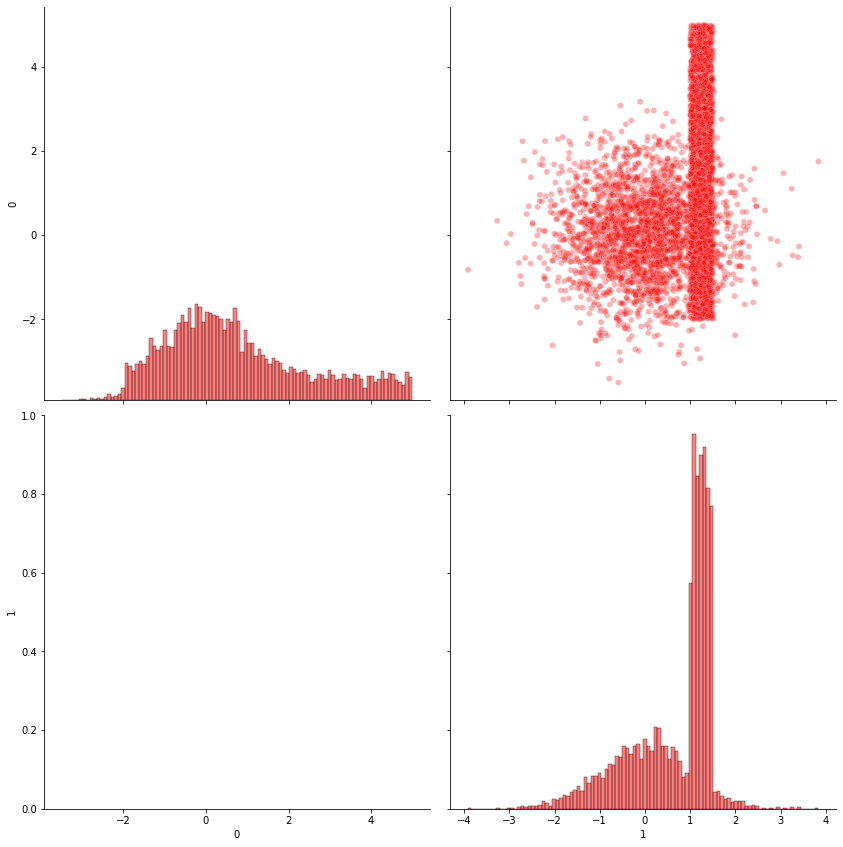

In [19]:
example = "Multimodal Dimension 1"
num_samples = 10000
target = Target(example, num_samples)
target.target_visual()
p, target_log_density, target_samples = target.get_target()

In [ ]:
num_samples = target_samples.shape[0]
epochs = 100
loss_values_list_EM = []
K = 7
for _ in range(50):
    EM = EMDensityEstimator(target_samples,K)
    loss_values = EM.train(epochs,visual=False)
    loss_values_list_EM.append(loss_values)

In [ ]:
crop = 0
plt.figure(figsize = (15,8))
data = torch.tensor(loss_values_list_EM)
mean = torch.mean(data, dim = 0)
std = torch.std(data, dim =0)
xx = torch.arange(1, data.shape[1]+1)
plt.plot(xx[crop:].numpy(), mean[crop:].numpy())
for i in range(data.shape[0]):
    plt.plot(xx[crop:].numpy(), data[i][crop:].numpy(), alpha = .5, color = 'grey')

In [ ]:
num_samples = target_samples.shape[0]
epochs = 50
batch_size = 50
loss_values_list_gmm_gradient = []
K = 7
for _ in range(10):
    initial_w = SoftmaxWeight(K, p, mode = 'Constant')
    dif = DIFDensityEstimator(target_samples,K)
    loss_values = dif.train(epochs,batch_size,visual=False)
    loss_values_list_gmm_gradient.append(loss_values)

In [ ]:
crop = 10
plt.figure(figsize = (15,8))
data = torch.tensor(loss_values_list_gmm_gradient)
mean = torch.mean(data, dim = 0)
std = torch.std(data, dim =0)
xx = torch.arange(1, data.shape[1]+1)
plt.plot(xx[crop:].numpy(), mean[crop:].numpy())
for i in range(data.shape[0]):
    plt.plot(xx[crop:].numpy(), data[i][crop:].numpy(), alpha = .5, color = 'grey')

In [ ]:
num_samples = target_samples.shape[0]
epochs = 50
batch_size = 50
loss_values_list_gmm_gradient = []
K = 2
for _ in range(10):
    initial_w = SoftmaxWeight(K, p, mode = 'Linear')
    dif = DIFDensityEstimator(target_samples,K)
    loss_values = dif.train(epochs,batch_size,visual=False)
    loss_values_list_gmm_gradient.append(loss_values)

In [ ]:
crop = 10
plt.figure(figsize = (15,8))
data = torch.tensor(loss_values_list_gmm_gradient)
mean = torch.mean(data, dim = 0)
std = torch.std(data, dim =0)
xx = torch.arange(1, data.shape[1]+1)
plt.plot(xx[crop:].numpy(), mean[crop:].numpy())
for i in range(data.shape[0]):
    plt.plot(xx[crop:].numpy(), data[i][crop:].numpy(), alpha = .4, color = 'grey')